## 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
%matplotlib inline

sns.set()

## 2. Load dataset

In [3]:
df = pd.read_csv('C:/Users/abc/OneDrive/Desktop/File Transfer/Projects/Cognifyz Internship/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 3. Data pre-processing

In [4]:
df.shape

(9551, 21)

There are 9551 rows and 21 columns in our dataset

In [5]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

  ## 4. Data Cleaning

I have now dropped all the columns that are irrelevant to the problem 

In [6]:
df.drop([ 'Country Code','City','Address', 'Locality Verbose', 'Longitude', 'Latitude','Rating color'], axis = 1, inplace =True)
df.head()

,Restaurant ID,Restaurant Name,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270
3,6318506,Ooma,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Excellent,229


 Checking and Handling Datatypes

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Locality              9551 non-null   object 
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Is delivering now     9551 non-null   object 
 9   Switch to order menu  9551 non-null   object 
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating text           9551 non-null   object 
 13  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.0+ MB


In [8]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [9]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

## 5. Feature Encoding

In [17]:
df['Has Online delivery'] = df['Has Online delivery'].replace({"Yes": 1, "No": 0})
df.head()

C:\Users\abc\AppData\Local\Temp\ipykernel_7648\3835503324.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Online delivery'] = df['Has Online delivery'].replace({"Yes": 1, "No": 0})


,Restaurant ID,Restaurant Name,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,0,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,0,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,0,No,No,4,4.4,Very Good,270
3,6318506,Ooma,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,0,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,0,No,No,4,4.8,Excellent,229


In [18]:
df['Has Table booking'] = df['Has Table booking'].replace({"Yes": 1, "No": 0})
df.head()

C:\Users\abc\AppData\Local\Temp\ipykernel_7648\3765897987.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Table booking'] = df['Has Table booking'].replace({"Yes": 1, "No": 0})


,Restaurant ID,Restaurant Name,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),1,0,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),1,0,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,No,No,4,4.4,Very Good,270
3,6318506,Ooma,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),0,0,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),1,0,No,No,4,4.8,Excellent,229


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
cuisine_encoded = one_hot_encoder.fit_transform(df[['Cuisines']])

cuisine_encoded_df = pd.DataFrame(cuisine_encoded, columns=one_hot_encoder.get_feature_names_out(['Cuisines']))

df_encoded = pd.concat([df, cuisine_encoded_df], axis=1).drop('Cuisines', axis=1)
data_with_location = df_encoded

## 6. Feature Selection

In [20]:
def Encode(dataset):
    for column in dataset.columns[~dataset.columns.isin(['Aggregate rating', 'Average Cost for two', 'votes'])]:
        dataset[column] = dataset[column].factorize()[0]
    return dataset

df_encoded = Encode(df.copy())
df_encoded['rate'] = df_encoded['Aggregate rating'].fillna(df_encoded['Aggregate rating'].mean())
df_encoded['Average Cost for two'] = df_encoded['Average Cost for two'].fillna(df_encoded['Average Cost for two'].mean())
print(df_encoded.isna().sum())
print(df_encoded.head())

df_encoded.isna().sum()

Restaurant ID           0
Restaurant Name         0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
rate                    0
dtype: int64
   Restaurant ID  Restaurant Name  Locality  Cuisines  Average Cost for two  \
0              0                0         0         0                  1100   
1              1                1         1         1                  1200   
2              2                2         2         2                  4000   
3              3                3         3         3                  1500   
4              4                4         3         4                  1500   

   Currency  Has Table booking  Has Online delivery  Is delivering now  \
0         0                  0                  

Restaurant ID           0
Restaurant Name         0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
rate                    0
dtype: int64

In [21]:
corr = df_encoded.corr(method='kendall')

<Axes: >

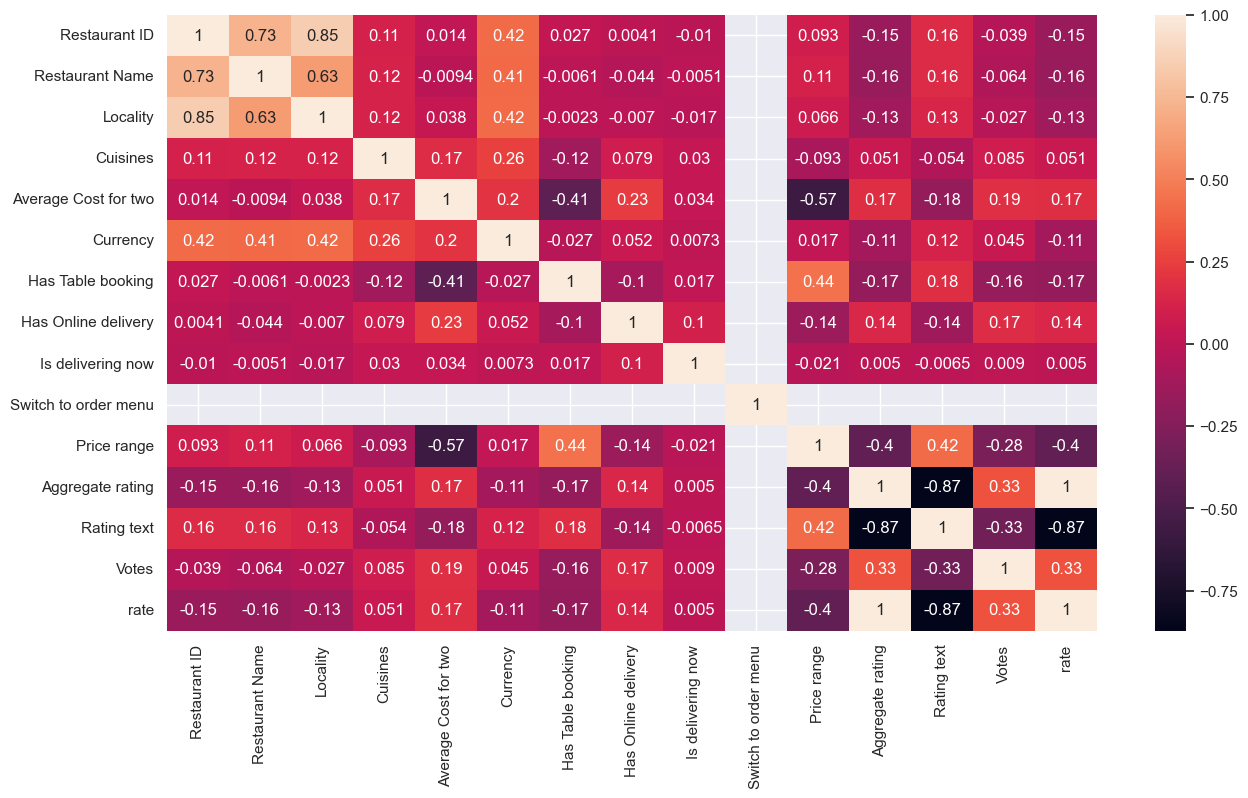

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

The highest correlation is between Resaturant Id and locality which is 0.85 which is not of very much concern


In [23]:
df_encoded.columns

Index(['Restaurant ID', 'Restaurant Name', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes', 'rate'],
      dtype='object')

Splitting data into training and testing sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_encoded.iloc[:,[2,3,4,10,13]]
Y = df_encoded['Aggregate rating']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X ,Y ,test_size=.1,random_state=353)

In [27]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (8595, 5)
x_test shape: (956, 5)
y_train shape: (8595,)
y_test shape: (956,)


In [28]:
x_train.head()

,Locality,Cuisines,Average Cost for two,Price range,Votes
8696,469,330,200,3,41
1164,401,554,1400,0,325
4824,753,504,450,3,220
7574,549,382,150,3,25
2961,670,464,600,2,160


In [29]:
y_train.head()

8696    0.0
1164    4.0
4824    3.2
7574    3.2
2961    2.3
Name: Aggregate rating, dtype: float64

## 7. Starting Regression(Prediction Part)

I could not decide on which model to use so I used the Linear Regression, Decision Tree and Random Forest Classifier. Based on the highest accuracy(highest R2 value), we will choose one model among these three.

# Applying Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.636532501993986
R-squared: 0.3352715264438749


Linear Regression has an accuracy of 33.5%

# Applying Decison Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
y_pred = DTree.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.20892259414225942
R-squared: 0.9151396034442583


Decision Tree has 91% accuracy

# Applying Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=353)
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)


Mean Squared Error: 0.11846091093503021
R-Squared: 0.9518834240041264


Therefore Random Forest Regressor (having 95% accuracy) is the best since it has the highest accuracy of all the three.

## 8. Data Visualization

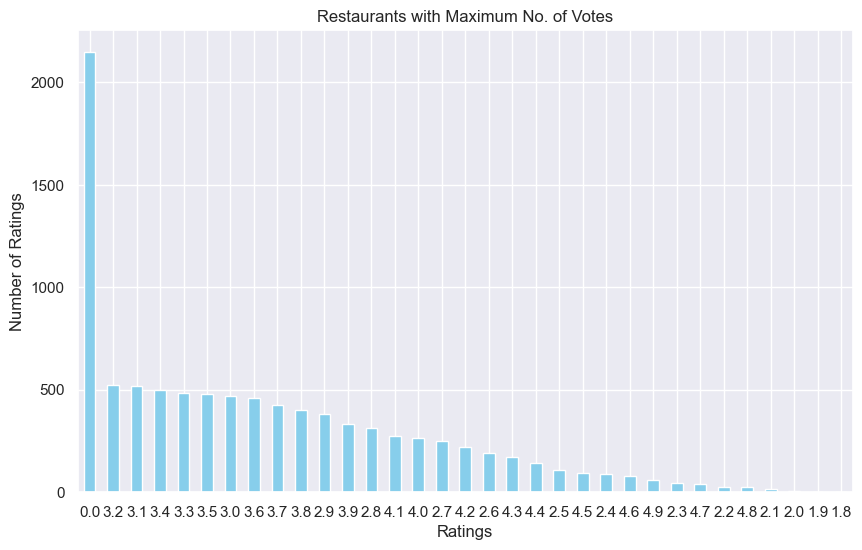

In [45]:
ratings = df['Aggregate rating']
rating_counts = ratings.value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title(f'Restaurants with Maximum No. of Votes')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show()


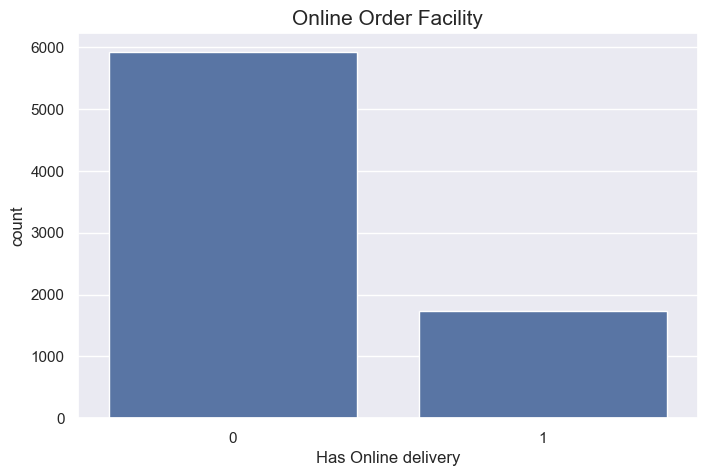

In [46]:

data =df[['Restaurant Name', 'Has Online delivery']].drop_duplicates()


plt.figure(figsize = (8,5))
ax = sns.countplot(x="Has Online delivery", data=data).set_title('Online Order Facility', fontsize = 15)
plt.show()


Less than 2000 Restaurants have online delivery

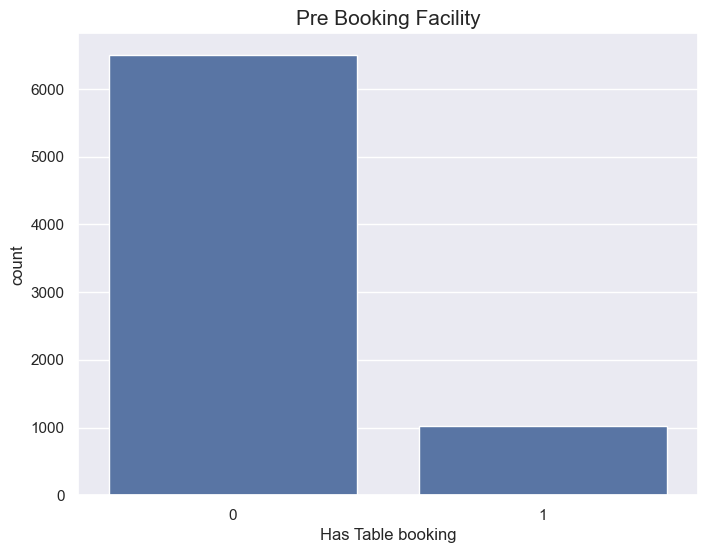

In [47]:

data = df[['Restaurant Name', 'Has Table booking']].drop_duplicates()


plt.figure(figsize = (8,6))
ax = sns.countplot(x="Has Table booking", data=data).set_title('Pre Booking Facility', fontsize = 15)
plt.show()


Only about 1000 Restaurants have Table booking facility

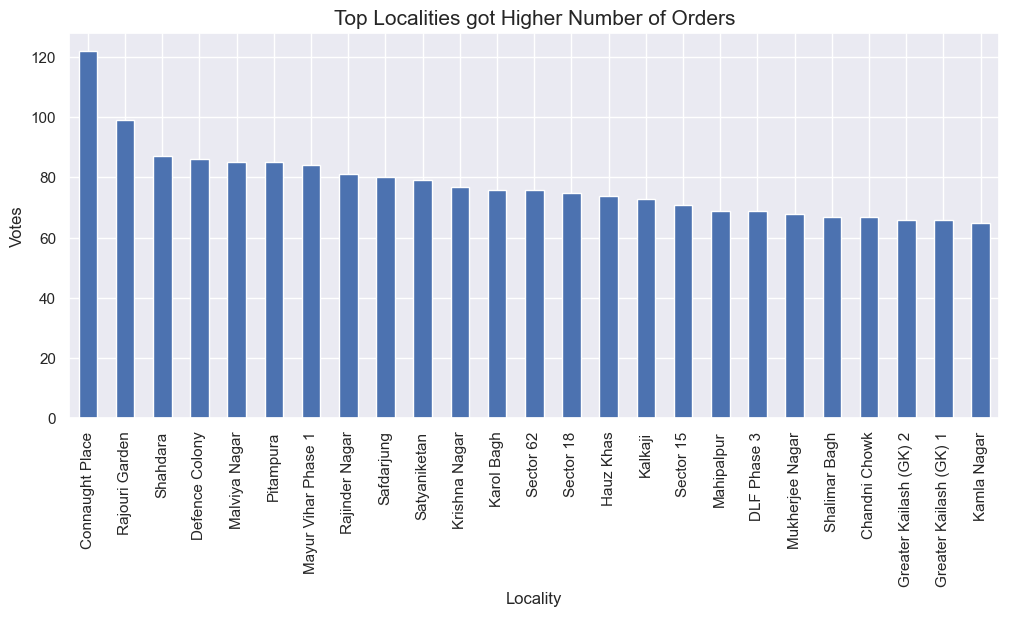

In [48]:
plt.figure(figsize = (12,5))
data = df.Locality.value_counts()[0:25]
data.plot(kind='bar')
plt.xlabel('Locality')
plt.ylabel('Votes')
plt.title("Top Localities got Higher Number of Orders", size=15)
plt.show()


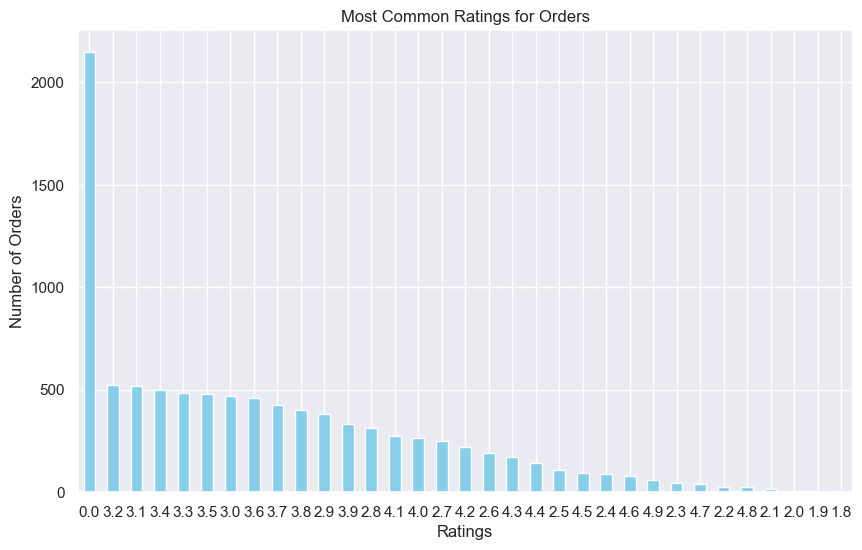

In [49]:
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Ratings for Orders')
plt.xlabel('Ratings')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


In [50]:
data = pd.DataFrame(df['Aggregate rating'].value_counts().reset_index()[:20])
data.columns = ['Average Cost for two', 'count']
data = data.set_index('Average Cost for two')

<function matplotlib.pyplot.show(close=None, block=None)>

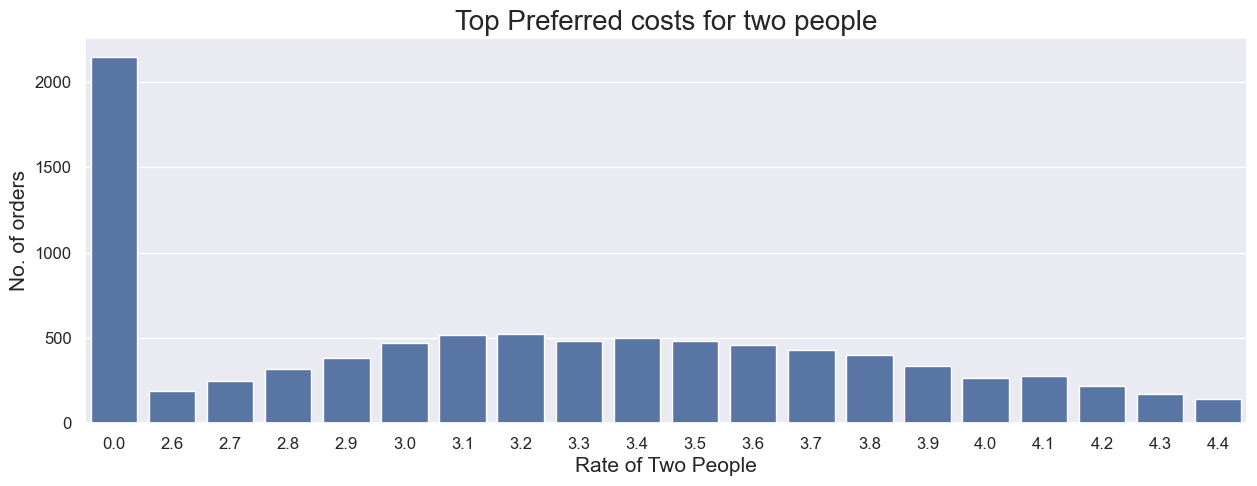

In [51]:

plt.figure(figsize = (15,5))
sns.barplot(x=data.index, y = data['count'])
plt.xlabel('Rate of Two People', size=15)
plt.ylabel('No. of orders', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top Preferred costs for two people', size=20)
plt.show
